In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import wordcloud as wcd

In [2]:
'''读入文本'''

filename = ["threebody.txt","rebirth.txt","warandpeace.txt"]
for file in filename:
    with open(file , "r" , encoding="utf-8") as f:
        if file == "threebody.txt":
            txt0 = f.read()
            pass
        elif file == "rebirth.txt":
            txt1 = f.read()
            pass
        else:
            txt2 = f.read()
            pass
        pass
    f.close()
    pass

'''做成列表'''

ls0 = jb.lcut(txt0)
ls1 = jb.lcut(txt1)
ls2 = jb.lcut(txt2)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.851 seconds.
Prefix dict has been built successfully.


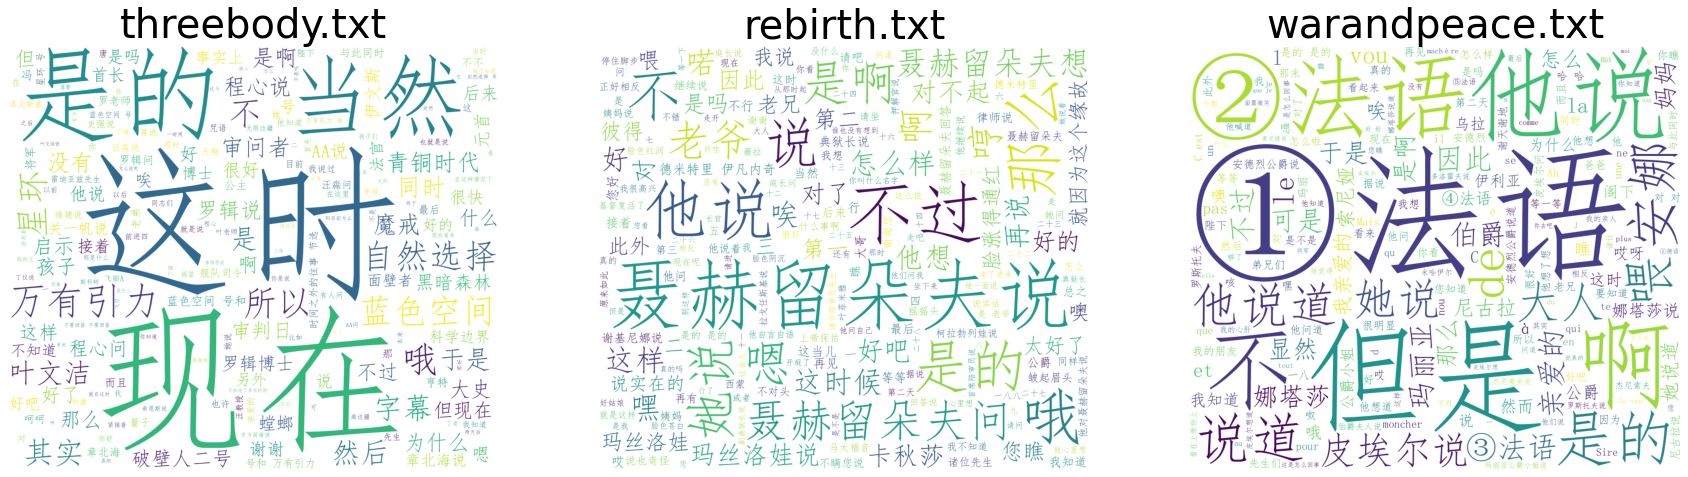

In [3]:
'''词云制图'''

pic0 = wcd.WordCloud(  
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色  
        #mask = backgroup_Image, #笼罩图  
        font_path = r'SIMFANG.TTF',#若有中文需要设置才会显示中文 
        width = 1000,  
        height = 860,  
        margin = 2).generate(txt0) # generate 可以对全部文本进行自动分词  
pic1 = wcd.WordCloud(  
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色  
        #mask = backgroup_Image, #笼罩图  
        font_path = r'SIMFANG.TTF',#若有中文需要设置才会显示中文 
        width = 1000,  
        height = 860,  
        margin = 2).generate(txt1) # generate 可以对全部文本进行自动分词 
pic2 = wcd.WordCloud(  
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色  
        #mask = backgroup_Image, #笼罩图  
        font_path = r'SIMFANG.TTF',#若有中文需要设置才会显示中文 
        width = 1000,  
        height = 860,  
        margin = 2).generate(txt2) # generate 可以对全部文本进行自动分词 

'''绘制词云，可视化'''

plt.figure(figsize = (30 , 8))
for i in range(3):
    plt.subplot(1 , 3 , i+1)
    plt.imshow(eval('pic'+str(i)))
    plt.axis('off')
    plt.title(filename[i] , fontsize = 40)
    pass
plt.show()

In [23]:
ls = ls0 + ls1 +ls2
ls = list(set(ls)) #去重
N = len(ls)
print("共有字词个数：",N)

共有字词个数： 57896


In [27]:
a0 = np.zeros(N)
a1 = np.zeros(N)
a2 = np.zeros(N)

for i in range(N):
    item = ls[i]
    a0[i] = ls0.count(item)
    a1[i] = ls1.count(item)
    a2[i] = ls2.count(item)
    pass

In [28]:
def cosine(vec1 , vec2):
    value1 = vec1.dot(vec2)
    value2 = np.sqrt(vec1.dot(vec1) * vec2.dot(vec2))
    v = value1 / value2
    return v 

In [29]:
cos1 = cosine(a0 , a1)
cos2 = cosine(a0 , a2)
cos1 - cos2

-0.5184137919812836

In [30]:
cos1

0.30941952568906894

In [31]:
cos2

0.8278333176703525